<a href="https://colab.research.google.com/github/joylcrangel/joylcrangel/blob/main/abalone_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [191]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import io
from google.colab import files 

# Subindo o arquivo abalone

In [192]:
arquivo_csv = files.upload()

Saving abalone.csv to abalone (3).csv


# Criando um data frame do pandas

In [193]:
df_abalone = pd.read_csv(io.BytesIO(arquivo_csv['abalone.csv']))

# Analisando o dataset

In [87]:
# conhecendo as cinco primeiras linhas

df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,"0,455","0,365","0,095","0,514","0,2245","0,101","0,15",15
1,M,"0,35","0,265","0,09","0,2255","0,0995","0,0485","0,07",7
2,F,"0,53","0,42","0,135","0,677","0,2565","0,1415","0,21",9
3,M,"0,44","0,365","0,125","0,516","0,2155","0,114","0,155",10
4,I,"0,33","0,255","0,08","0,205","0,0895","0,0395","0,055",7


In [88]:
# verificando valores faltantes 

df_abalone.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [89]:
df_abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,"0,455","0,365","0,095","0,514","0,2245","0,101","0,15",15
1,M,"0,35","0,265","0,09","0,2255","0,0995","0,0485","0,07",7
2,F,"0,53","0,42","0,135","0,677","0,2565","0,1415","0,21",9
3,M,"0,44","0,365","0,125","0,516","0,2155","0,114","0,155",10
4,I,"0,33","0,255","0,08","0,205","0,0895","0,0395","0,055",7
...,...,...,...,...,...,...,...,...,...
4172,F,"0,565","0,45","0,165","0,887","0,37","0,239","0,249",11
4173,M,"0,59","0,44","0,135","0,966","0,439","0,2145","0,2605",10
4174,M,"0,6","0,475","0,205","1,176","0,5255","0,2875","0,308",9
4175,F,"0,625","0,485","0,15","1,0945","0,531","0,261","0,296",10


In [90]:
# verificando medidas estatísticas 

df_abalone.describe()

,Rings
count,4177.000000
mean,9.933684
std,3.224169
min,1.000000
25%,8.000000
50%,9.000000
75%,11.000000
max,29.000000


In [91]:
# matriz de correlação 

df_abalone.corr()

,Rings
Rings,1.0


In [92]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             4177 non-null   object
 1   Length          4177 non-null   object
 2   Diameter        4177 non-null   object
 3   Height          4177 non-null   object
 4   Whole weight    4177 non-null   object
 5   Shucked weight  4177 non-null   object
 6   Viscera weight  4177 non-null   object
 7   Shell weight    4177 non-null   object
 8   Rings           4177 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 293.8+ KB


## Tratando os dados 

In [194]:
# traduzindo as variaveis do dataset

df_abalone.rename(columns={'Sex': 'Sexo', 'Length':'Comprimento', 'Diameter':'Diametro', 'Height':'Altura', 'Whole weight':'Peso atual', 'Shucked weight':'Peso descascado', 
                           'Viscera weight':'Peso viceral', 'Shell weight':'Peso da casca', 'Rings':'Argolas'}, inplace=True)

In [195]:
df_abalone['Comprimento'] = df_abalone['Comprimento'].str.replace(',', '.')
df_abalone['Diametro'] = df_abalone['Diametro'].str.replace(',', '.')
df_abalone['Altura'] = df_abalone['Altura'].str.replace(',', '.')
df_abalone['Peso atual'] = df_abalone['Peso atual'].str.replace(',', '.')
df_abalone['Peso descascado'] = df_abalone['Peso descascado'].str.replace(',', '.')
df_abalone['Peso viceral'] = df_abalone['Peso viceral'].str.replace(',', '.')
df_abalone['Peso da casca'] = df_abalone['Peso da casca'].str.replace(',', '.')

In [196]:
df_abalone['Comprimento'] = df_abalone['Comprimento'].astype(float)
df_abalone['Diametro'] = df_abalone['Diametro'].astype(float)
df_abalone['Altura'] = df_abalone['Altura'].astype(float)
df_abalone['Peso atual'] = df_abalone['Peso atual'].astype(float)
df_abalone['Peso descascado'] = df_abalone['Peso descascado'].astype(float)
df_abalone['Peso viceral'] = df_abalone['Peso viceral'].astype(float)
df_abalone['Peso da casca'] = df_abalone['Peso da casca'].astype(float)
df_abalone['Argolas'] = df_abalone['Argolas'].astype(float)

In [197]:
df_abalone['Sexo'] = df_abalone['Sexo'].str.replace('M', '1').str.replace('F','2').str.replace('I','3')

In [198]:
df_abalone['Sexo'] = df_abalone['Sexo'].astype(int)

In [199]:
df_abalone['Idade']= df_abalone['Argolas'] + 1.5


In [200]:
df_abalone

,Sexo,Comprimento,Diametro,Altura,Peso atual,Peso descascado,Peso viceral,Peso da casca,Argolas,Idade
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,11.5
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,10.5
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,11.5


In [201]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sexo             4177 non-null   int64  
 1   Comprimento      4177 non-null   float64
 2   Diametro         4177 non-null   float64
 3   Altura           4177 non-null   float64
 4   Peso atual       4177 non-null   float64
 5   Peso descascado  4177 non-null   float64
 6   Peso viceral     4177 non-null   float64
 7   Peso da casca    4177 non-null   float64
 8   Argolas          4177 non-null   float64
 9   Idade            4177 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 326.5 KB


In [202]:
df_abalone.describe()

,Sexo,Comprimento,Diametro,Altura,Peso atual,Peso descascado,Peso viceral,Peso da casca,Argolas,Idade
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,1.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,2.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,3.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,3.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


In [21]:
df_abalone.corr()

,Sexo,Comprimento,Diametro,Altura,Peso atual,Peso descascado,Peso viceral,Peso da casca,Argolas
Sexo,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Comprimento,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diametro,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Altura,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Peso atual,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Peso descascado,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Peso viceral,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Peso da casca,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Argolas,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Matriz de correlação

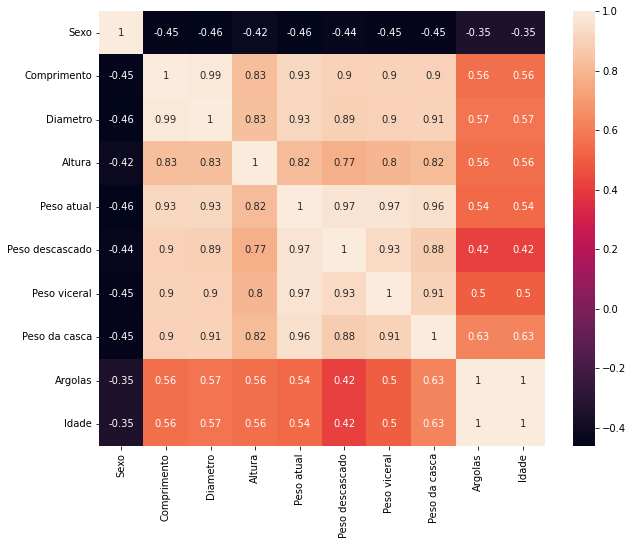

In [150]:
corr_df = df_abalone.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True)
plt.show()

# Correlação entre as variáveis 

# Gráficos de dispersão: diâmetro x peso da casca

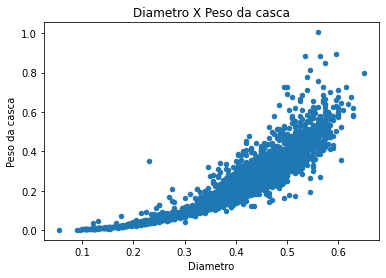

In [23]:
scatter_plot=df_abalone.plot.scatter(x='Diametro', y='Peso da casca', title='Diametro X Peso da casca')
scatter_plot.plot()
plt.show()


# Gráficos de dispersão: peso atual x peso da casca

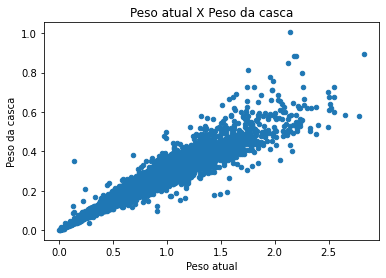

In [24]:
scatter_plot=df_abalone.plot.scatter(x='Peso atual', y='Peso da casca', title='Peso atual X Peso da casca')
scatter_plot.plot()
plt.show()

# Gráficos de dispersão: peso viceral x peso da casca

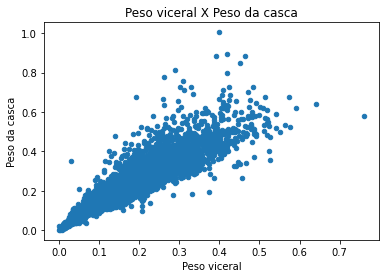

In [25]:
scatter_plot=df_abalone.plot.scatter(x='Peso viceral', y='Peso da casca', title='Peso viceral X Peso da casca')
scatter_plot.plot()
plt.show()

# Gráficos de dispersão: argolas x peso da casca

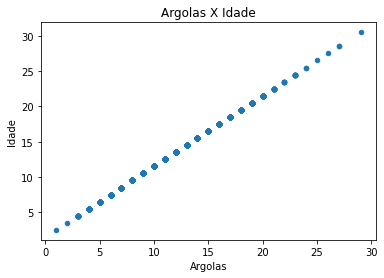

In [152]:
scatter_plot=df_abalone.plot.scatter(x='Argolas', y='Idade', title='Argolas X Idade')
scatter_plot.plot()
plt.show()


# *Regressão* *Linear* 

## Construindo a reta de Regressão Linear

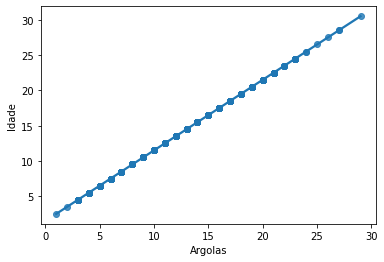

In [157]:
ax = sns.regplot(x="Argolas", y="Idade", data=df_abalone)

## Preparando o modelo para ser treinado

In [203]:
y = df_abalone['Idade']
x = df_abalone[['Argolas']]

In [167]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Idade, Length: 4177, dtype: float64

In [168]:
x

,Argolas
0,15.0
1,7.0
2,9.0
3,10.0
4,7.0
...,...
4172,11.0
4173,10.0
4174,9.0
4175,10.0


In [204]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2811)

## Estimando a reta de Regressão Linear


In [182]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

modelo = LinearRegression()

## Treinando o modelo 

In [163]:
modelo.fit(x_train, y_train)

LinearRegression()

## Fazendo a predição

In [164]:
X_new = [[1, 0.2, 9]] # peso atual, peso viceral, argolas
y_new = modelo.predict(X_new)
print("Nova entrada=%s, Valor predito: %s " % (X_new, y_new)) 

Nova entrada=[[1, 0.2, 9]], Valor predito: [10.5] 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


## Avaliando o modelo

In [165]:
print('R² = {}'.format(modelo.score(x_test, y_test)))

R² = 1.0


# *Classificação*

In [210]:
df_abalone['Idade'] = df_abalone['Idade'].astype(str)

In [211]:
df_abalone

,Sexo,Comprimento,Diametro,Altura,Peso atual,Peso descascado,Peso viceral,Peso da casca,Argolas,Idade
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,16.5
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,8.5
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,10.5
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,11.5
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,12.5
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,11.5
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,10.5
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,11.5


In [212]:
import sklearn.model_selection as model_selection

In [213]:
features = df_abalone[['Peso da casca', 'Peso viceral', 'Peso atual', 'Sexo', 'Peso descascado', 'Altura', 'Argolas']].values
classe = df_abalone['Idade'].values

In [214]:
# randomstate 1 garante que o dataset sempre será particionado da mesma forma
(features_treino, features_teste, classe_treino, classe_teste) = model_selection.train_test_split(features, classe, train_size=0.7, random_state=1)

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,classe, test_size=0.33, random_state=42)

In [216]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(100,150,50), max_iter=900,activation = 'logistic',solver='adam',random_state=1,verbose=True)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

Iteration 1, loss = 3.21672856
Iteration 2, loss = 2.81002257
Iteration 3, loss = 2.62290277
Iteration 4, loss = 2.55834509
Iteration 5, loss = 2.53300545
Iteration 6, loss = 2.52133771
Iteration 7, loss = 2.51543975
Iteration 8, loss = 2.51107202
Iteration 9, loss = 2.50966710
Iteration 10, loss = 2.50730498
Iteration 11, loss = 2.50562787
Iteration 12, loss = 2.50393053
Iteration 13, loss = 2.50229286
Iteration 14, loss = 2.49981911
Iteration 15, loss = 2.49559847
Iteration 16, loss = 2.48844610
Iteration 17, loss = 2.47314469
Iteration 18, loss = 2.44251879
Iteration 19, loss = 2.38677380
Iteration 20, loss = 2.31117652
Iteration 21, loss = 2.23211471
Iteration 22, loss = 2.15649912
Iteration 23, loss = 2.08237280
Iteration 24, loss = 2.00779810
Iteration 25, loss = 1.93067410
Iteration 26, loss = 1.85327371
Iteration 27, loss = 1.77857165
Iteration 28, loss = 1.70380834
Iteration 29, loss = 1.63500679
Iteration 30, loss = 1.57150572
Iteration 31, loss = 1.51158757
Iteration 32, los

In [217]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred)) 

Matriz Confusa: 
[[229   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0 213   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0 155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0  88   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0  61   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0  21   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0  17   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0  15   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   9   0   0   0   0   0   0   0   0   0   0   0
    0   0   0]
 [  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo:', accuracy_score(y_test, y_pred))

Acurácia do modelo: 0.9390862944162437


In [219]:
classifier.predict(X_test[50:80])

array(['7.5', '16.5', '9.5', '6.5', '8.5', '11.5', '16.5', '16.5', '11.5',
       '10.5', '11.5', '14.5', '12.5', '8.5', '10.5', '12.5', '5.5',
       '6.5', '8.5', '10.5', '11.5', '12.5', '11.5', '8.5', '10.5',
       '13.5', '16.5', '15.5', '16.5', '10.5'], dtype='<U4')